In [3]:


import healpy as hp
import numpy as np
import matplotlib.pyplot as plt


import circle
import utils


N_side = 16  # Choose your resolution
pixel_id = 42  # Example pixel index

# Get the boundaries of the pixel
boundaries = hp.boundaries(N_side, pixel_id, step=1)
theta, phi = hp.vec2ang(np.transpose(boundaries))

# Convert to degrees for plotting
theta_deg = np.degrees(theta)
phi_deg = np.degrees(phi)

# Plot
# plt.figure()
hp.visufunc.projscatter(theta, phi, lonlat=False, c='red')  # Plot edges
hp.visufunc.projtext(np.mean(theta), np.mean(phi), str(pixel_id), lonlat=False, color='blue')  # Center
plt.show()


<Figure size 640x480 with 0 Axes>

In [4]:
reddening_distance_slices = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

In [5]:
def make_position_vector_from_spherical(l,b,r):
    x = r * np.cos(b) * np.cos(l)
    y = r * np.cos(b) * np.sin(l)
    z = r * np.sin(b)
    return np.array([x,y,z])



In [6]:
#### check that the ray is not in the plane defined by any of the healpix edges


In [7]:
class class_isrf():
    def __init__(self):
        

SyntaxError: incomplete input (1204857459.py, line 3)

In [8]:
isrf_point_l = 0
isrf_point_b = 0
isrf_point_r = 0

star_l = 1
star_b = 1
star_r = 1


In [9]:


star_pos = make_position_vector_from_spherical(star_l,star_b,star_r)
isrf_pos = make_position_vector_from_spherical(isrf_point_l,isrf_point_b,isrf_point_r)

direction = isrf_pos - star_pos
direction_abs = np.dot(direction,direction)**0.5
star_dot_direction = np.dot(star_pos,direction)


In [10]:
def ray_linear_parameterization(star_pos,direction, t):
    return star_pos + t*direction


def p(star_pos,direction, t):
    x0,y0,z0 = star_pos
    a,b,c = direction
    p = ((x0 + t*a)**2 + (y0 + t*b)**2 + (z0 + t*c)**2)**0.5  
    return p

def find_crossing_positions(star_r,star_dot_direction,direction_abs,d):
    a = direction_abs**2
    b = 2*star_dot_direction
    c = star_r**2-d**2
    t1 = (-b + (b**2 - 4*a*c)**0.5)/(2*a)
    t2 = (-b - (b**2 - 4*a*c)**0.5)/(2*a)
    return t1,t2




#x = (-b +- (b^2-4ac)^0.5)/2a

In [11]:
find_crossing_positions(star_r,star_dot_direction,direction_abs,0.5)

(1.5, 0.5)

In [12]:
# Example galactic coordinates (longitude, latitude, radius)
coordinates = [
    (-77.016, -12.033, 1),   # Center of the galaxy
    (110.43, -7.78, 1) # Some point in space
]

# Convert to Cartesian coordinates for plotting
points = np.array([utils.galactic_to_cartesian(*coord) for coord in coordinates])

In [13]:
center = np.array([1,0,0])
p1 = points[0]+center
p2 = points[1]+center

### Calculate the radius of the center of the circle
r =  np.linalg.norm(p1 - center)
### Calculate the normal vector of the plane defined by the circle
n = np.cross(p1 - center,p2 - center)
### Normalize the normal vector
n0 = n/np.linalg.norm(n)
### Calculate the other perpendicular vectors
q1 = p1
q2 = center + np.cross(n0,p1 - center)




In [75]:


def vectorized_circle_properties(p1_array, p2_array, center):
    # Calculate radii (shape: (N,))
    radius = np.linalg.norm(p1_array - center, axis=1)

    # Calculate normal vectors (shape: (N, 3))
    n = np.cross(p1_array - center, p2_array - center)

    # Normalize the normal vectors (shape: (N, 3))
    n_norm = np.linalg.norm(n, axis=1, keepdims=True)
    n0 = n / n_norm

    # Normalize q1 vectors (shape: (N, 3))
    q1_norm = np.linalg.norm(p1_array-center, axis=1, keepdims=True)
    q1 = (p1_array -center)/ q1_norm

    # Calculate q2 vectors (shape: (N, 3))
    q2 = np.cross(n0, q1)

    return radius, n0, q1, q2



def parameterize_circle(center, radius, q1, q2, theta):


    # THIS IS ERRORING, I NEED TO FIX THIS
  
    """
    Parameterize circles with given radii and centers, using 3D basis vectors spanning the circle plane.
    
    Parameters:
        center: array-like shape (3,) or (N,3), center(s) of the circle(s)
        radius: float or array-like shape (N,), radius/radii of the circle(s)
        q1: array-like shape (3,) or (N,3), normalized basis vector(s), perpendicular to circle normal
        q2: array-like shape (3,) or (N,3), normalized basis vector(s), perpendicular to circle normal and q1
        theta: float, numpy array shape (M,), or numpy array shape (N, M), angle(s) in radians to parameterize the circle

    Returns:
        np.array shape of (3,), (M,3) or (N,M,3) : Array of points on each circle parameterized by theta
    """

    #This ensures consistent handling of inputs (single 3D points or arrays of 3D points) without separate cases, 
    center = np.atleast_2d(center)
    q1 = np.atleast_2d(q1)
    q2 = np.atleast_2d(q2)

    radius = np.atleast_1d(radius)
    theta = np.atleast_2d(theta)

    # Ensure proper broadcasting
    center = center[:, np.newaxis, :]  # Shape (N,1,3)
    q1 = q1[:, np.newaxis, :]          # Shape (N,1,3)
    q2 = q2[:, np.newaxis, :]          # Shape (N,1,3)
    radius = radius[:, np.newaxis, np.newaxis]  # Shape (N,1,1)
    theta = theta[:, :, np.newaxis]    # Shape (1,M,1)
   
    # Parameterize circle(s)
    points = center + radius * (np.cos(theta)*q1 +
                                np.sin(theta)*q2)

    # print(points)

    
    print(points.shape)
    return points.squeeze()  #if only one set of inputs (N=1) is provided, .squeeze() simplifies the output dimensions accordingly.


def parameterize_circle_old(center, radius, q1,q2,theta):
    """
    parameterize a circle with a given radius and center, using the 3 basis vectors spanning the circle plane and the normal of the plane
    center: np.array([x,y,z]) center of the circle
    radius: float, radius of the circle
    input: 
        q1: np.array([x,y,z]) normalized basis vector, perpendicular to n0
        q2: np.array([x,y,z]) normalized basis vector, perpendicular to n0 and q1
        theta: float, or numpy array, angle in radians 
    output: np.array([x,y,z]) point on the circle, or array of points on the circle
    """

    x = center[0] + radius*(np.cos(theta) *q1[0] + np.sin(theta)*q2[0] )
    y = center[1] + radius*(np.cos(theta) *q1[1] + np.sin(theta)*q2[1] )
    z = center[2] + radius*(np.cos(theta) *q1[2] + np.sin(theta)*q2[2] )
    return np.array([x,y,z])



def parameterize_with_normal_vectors(p1,p2,theta,center = np.array([0,0,0])):
    """

    """
    ### Calculate the radius of the center of the circle
    radius =  np.linalg.norm(p1 - center)
    ### Calculate the normal vector of the plane defined by the circle
    n = np.cross(p1 - center,p2 - center)
    ### Normalize the normal vector
    n0 = n/np.linalg.norm(n)
    n = np.cross(p1 - center,p2 - center)
    n0 = n/np.linalg.norm(n)
    q1 = (p1-center)/np.linalg.norm(p1-center)
    q2 = np.cross(n0,q1)

    circle_samples = parameterize_circle(center,radius, q1,q2,theta) 
    print(circle_samples)
    #print(parameterize_circle_old(center,radius, q1,q2,theta))
    return circle_samples
    # return parameterize_circle(center,radius, q1,q2,theta)



In [76]:
theta = np.linspace(0,2*np.pi,10)
#circle = parameterize_circle_unnorm(center,q1,q2,theta)

circle_samples = parameterize_with_normal_vectors(p1, p2, theta, center = center)

(1, 10)
(1, 10, 3)
[[ 1.21974223 -0.9530223  -0.20847503]
 [ 0.91730995 -0.65941697 -0.74721591]
 [ 0.65356926 -0.05726311 -0.93632616]
 [ 0.55192737  0.5716848  -0.687319  ]
 [ 0.65994363  0.93313504 -0.11670763]
 [ 0.92707605  0.85796102  0.50851253]
 [ 1.2283304   0.3813375   0.89579403]
 [ 1.42274641 -0.27371807  0.86392354]
 [ 1.41935468 -0.80069791  0.42781364]
 [ 1.21974223 -0.9530223  -0.20847503]]


In [77]:
theta = 0.
#circle = parameterize_circle_unnorm(center,q1,q2,theta)

circle_samples = parameterize_with_normal_vectors(p1, p2, theta, center = center)

(1, 1)
(1, 1, 3)
[ 1.21974223 -0.9530223  -0.20847503]


In [78]:
theta = 0.
#circle = parameterize_circle_unnorm(center,q1,q2,theta)

circle_samples = parameterize_with_normal_vectors(np.array([p1,p1]), np.array([p2,p2]), theta, center = center)

(1, 1)
(2, 1, 3)
[[ 1.21974223 -0.9530223  -0.20847503]
 [ 1.21974223 -0.9530223  -0.20847503]]


In [79]:
theta = 0.
#circle = parameterize_circle_unnorm(center,q1,q2,theta)

circle_samples = parameterize_with_normal_vectors(np.array([p1,p1]), np.array([p2,p2]), theta, center = np.array([center,center]))

(1, 1)
(2, 1, 3)
[[ 1.21974223 -0.9530223  -0.20847503]
 [ 1.21974223 -0.9530223  -0.20847503]]


In [80]:
theta = np.linspace(0,2*np.pi,10)
#circle = parameterize_circle_unnorm(center,q1,q2,theta)

circle_samples = parameterize_with_normal_vectors(np.array([p1,p1]), np.array([p2,p2]), theta, center = np.array([center,center]))

(1, 10)
(2, 10, 3)
[[[ 1.21974223 -0.9530223  -0.20847503]
  [ 0.9908327  -0.68010708 -0.57513682]
  [ 0.76621265 -0.0889622  -0.6726857 ]
  [ 0.6509843   0.54380908 -0.45547746]
  [ 0.69906427  0.92212606 -0.02514626]
  [ 0.88795542  0.86897     0.41695115]
  [ 1.12927347  0.40921322  0.66395249]
  [ 1.31010303 -0.24201897  0.60028308]
  [ 1.34583193 -0.7800078   0.25573454]
  [ 1.21974223 -0.9530223  -0.20847503]]

 [[ 1.21974223 -0.9530223  -0.20847503]
  [ 0.9908327  -0.68010708 -0.57513682]
  [ 0.76621265 -0.0889622  -0.6726857 ]
  [ 0.6509843   0.54380908 -0.45547746]
  [ 0.69906427  0.92212606 -0.02514626]
  [ 0.88795542  0.86897     0.41695115]
  [ 1.12927347  0.40921322  0.66395249]
  [ 1.31010303 -0.24201897  0.60028308]
  [ 1.34583193 -0.7800078   0.25573454]
  [ 1.21974223 -0.9530223  -0.20847503]]]


In [81]:
theta = np.array([np.linspace(0,2*np.pi,10),np.linspace(0,2*np.pi,10)])
#circle = parameterize_circle_unnorm(center,q1,q2,theta)

circle_samples = parameterize_with_normal_vectors(np.array([p1,p1]), np.array([p2,p2]), theta, center = np.array([center,center]))

(2, 10)
(2, 10, 3)
[[[ 1.21974223 -0.9530223  -0.20847503]
  [ 0.9908327  -0.68010708 -0.57513682]
  [ 0.76621265 -0.0889622  -0.6726857 ]
  [ 0.6509843   0.54380908 -0.45547746]
  [ 0.69906427  0.92212606 -0.02514626]
  [ 0.88795542  0.86897     0.41695115]
  [ 1.12927347  0.40921322  0.66395249]
  [ 1.31010303 -0.24201897  0.60028308]
  [ 1.34583193 -0.7800078   0.25573454]
  [ 1.21974223 -0.9530223  -0.20847503]]

 [[ 1.21974223 -0.9530223  -0.20847503]
  [ 0.9908327  -0.68010708 -0.57513682]
  [ 0.76621265 -0.0889622  -0.6726857 ]
  [ 0.6509843   0.54380908 -0.45547746]
  [ 0.69906427  0.92212606 -0.02514626]
  [ 0.88795542  0.86897     0.41695115]
  [ 1.12927347  0.40921322  0.66395249]
  [ 1.31010303 -0.24201897  0.60028308]
  [ 1.34583193 -0.7800078   0.25573454]
  [ 1.21974223 -0.9530223  -0.20847503]]]


In [46]:
q1[0]-center[0]

0.2197422345732798

In [47]:
q2[0]-center[0]


-0.3905214727359676

In [16]:
%matplotlib widget
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import utils

Text(0.5, 0.92, '3D Galactic Visualization')

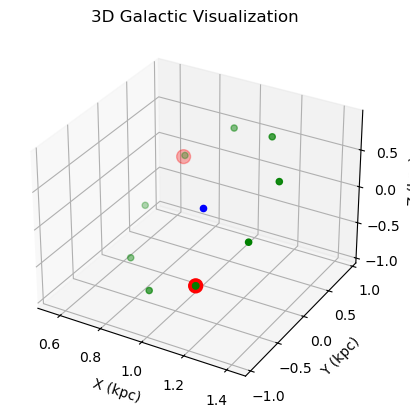

In [29]:
# Plot points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter([p1[0], p2[0]],[p1[1], p2[1]], [p1[2],p2[2]], color='r', s=100)
ax.scatter(center[0],center[1],center[2], color='b')
ax.scatter(circle_samples[:,0],circle_samples[:,1],circle_samples[:,2], color='g')
# ax.scatter(points[:,0], points[:,1], points[:,2], color='r')

# # Draw lines between points
# for i in range(len(points)-1):
#     ax.plot([points[i][0], points[i+1][0]], [points[i][1], points[i+1][1]], [points[i][2], points[i+1][2]], color='blue')

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('3D Galactic Visualization')

In [28]:

# Add spherical shell at radius 1
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="k", alpha=0.5)

In [ ]:
https://healpy.readthedocs.io/en/latest/generated/healpy.query_polygon.html

In [ ]:
vertices = np.array([[1,0,0],[1,1.1,0],[1,0,1.1]])

hp.query_polygon(nside=1,vertices=vertices, inclusive=True)

array([0, 3, 4, 5, 8])

In [ ]:
points

array([[ 0.21974223, -0.9530223 , -0.20847503],
       [-0.34584969,  0.92847349, -0.13536973]])

In [ ]:
vertices = np.array([[1,0,0],[1,1.1,0],[1,0,1E-10]])

hp.query_polygon(nside=1,vertices=vertices, inclusive=True)

array([0, 4, 5, 8])